In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras

In [3]:
from bellson.libbellson.model import load_model
from bellson.libbellson.library_iterator import TrackIterator

In [4]:
modelf = "/home/adam/projects/bellson/bellson/libbellson/models/model_v7_best.hdf5"
m = load_model(modelf)

In [5]:
track = "/home/adam/Music/oocj-169bpm.flac"
ti = TrackIterator.from_filename(track)
sample = ti.get_random_sample()

<Figure size 14400x7200 with 0 Axes>

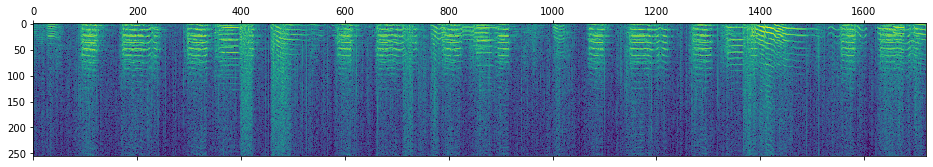

In [37]:
plt.figure(figsize=(200,100))
plt.matshow(sample.reshape((256,1720)), cmap='viridis')

In [42]:
layer_names = [] 
for layer in m.layers: 
    print(str(layer))
    layer_names.append(layer.name)
print(layer_names)

for layer in m.layers[1:3]: 
    print(str(layer.kernel_size) + str(layer.strides))


['input_1', 'conv2d', 'conv2d_1', 'flatten', 'dense', 'dropout', 'dense_1', 'dropout_1', 'dense_2', 'dropout_2', 'dense_3']
(35, 35)(13, 13)
(35, 35)(3, 3)


In [23]:
layer_outputs = [layer.output for layer in m.layers[0:4]]
activation_model = keras.Model(inputs=m.input, outputs=layer_outputs)
activations = activation_model.predict(sample)

In [24]:
for layer in activations: 
    print(layer.shape)

(256, 1720, 1, 1)
(256, 133, 1, 16)
(256, 45, 1, 16)
(256, 720)


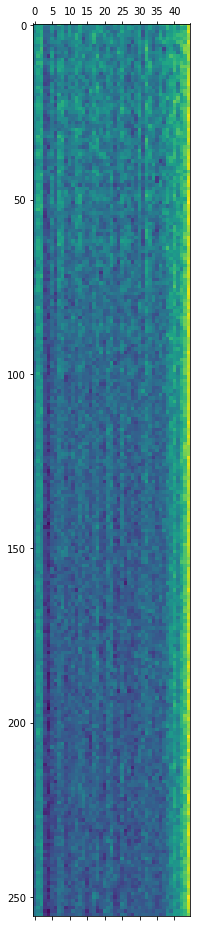

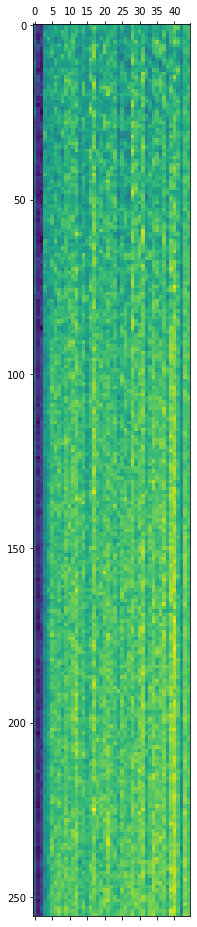

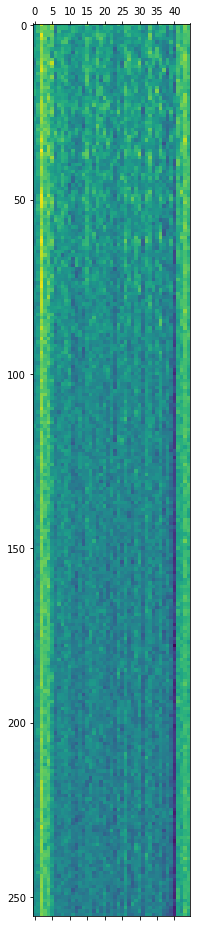

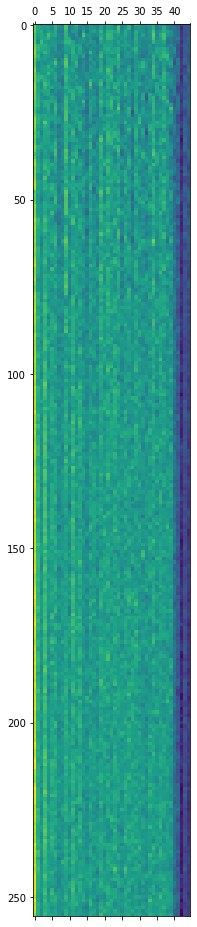

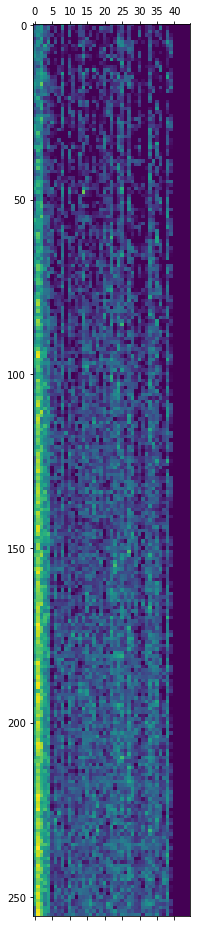

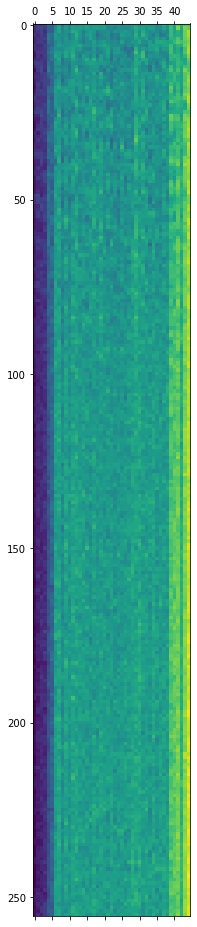

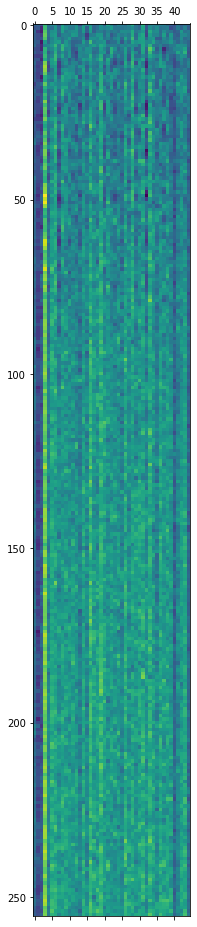

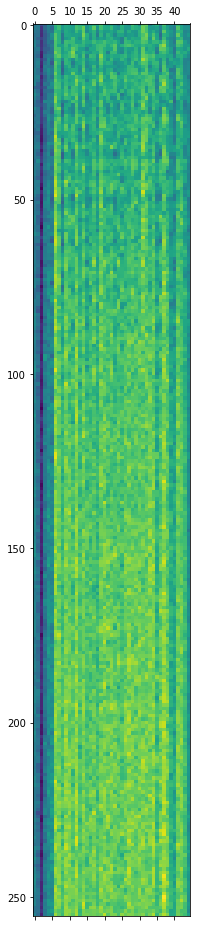

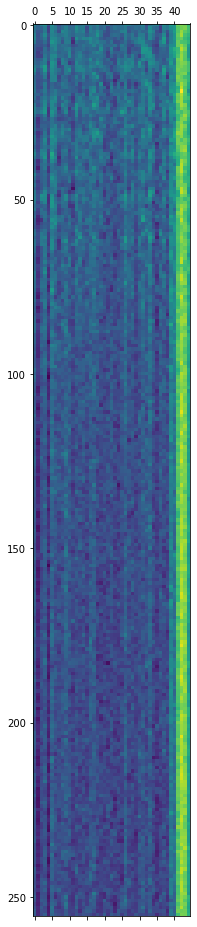

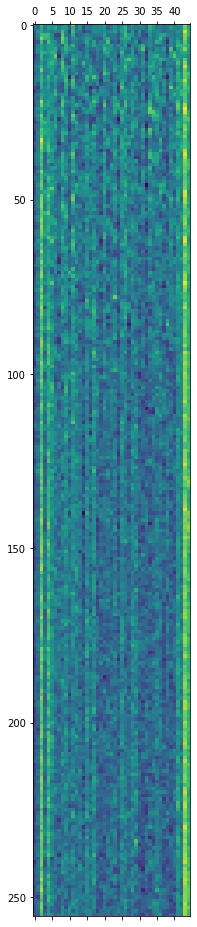

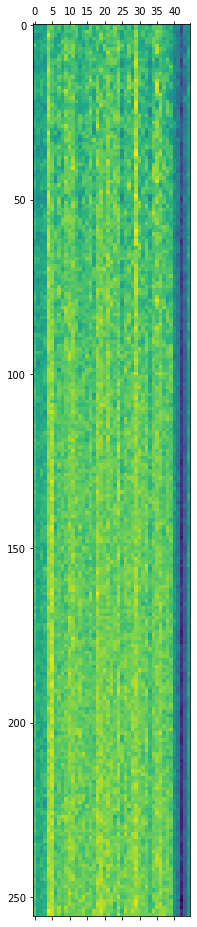

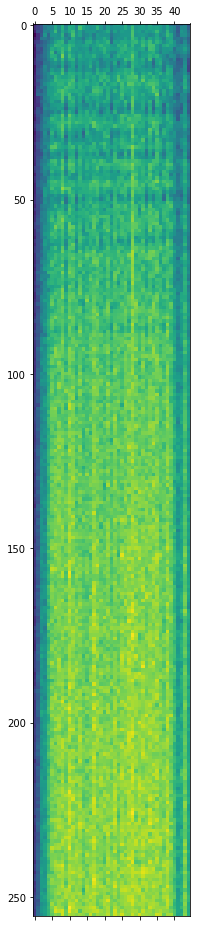

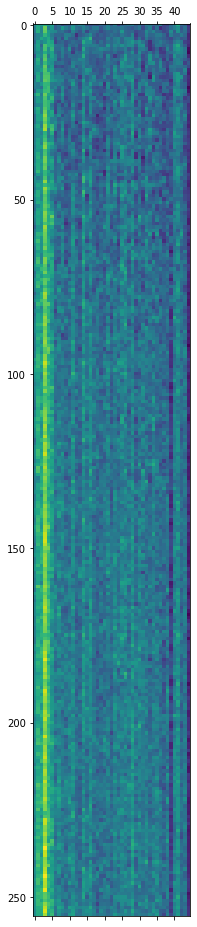

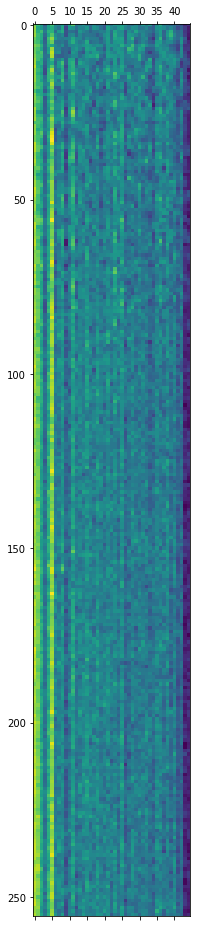

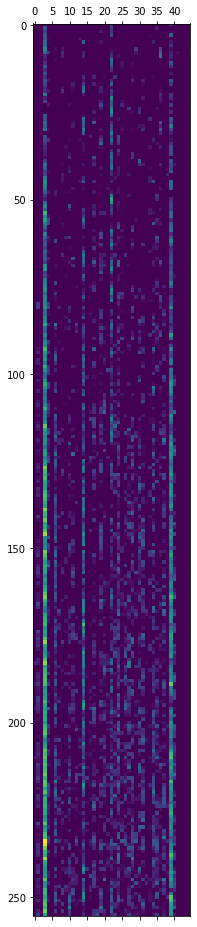

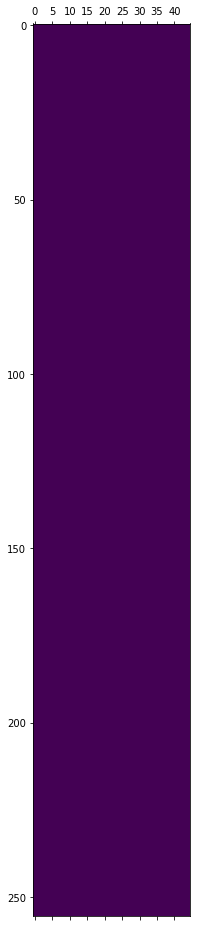

In [32]:
for i in range(0, 16): 
    plt.matshow(activations[2][:, :, 0, i], cmap='viridis')

<Figure size 1440x720 with 0 Axes>

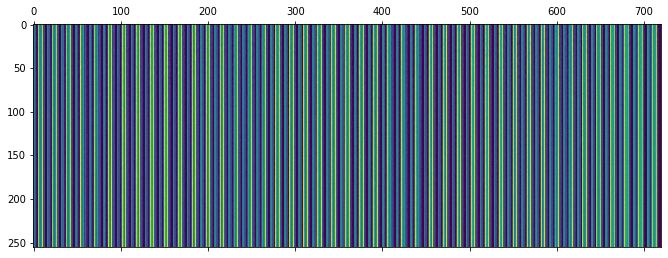

In [35]:
plt.figure(figsize=(20,10))
plt.matshow(activations[3], cmap='viridis')